In [3]:
# SDA Term Project
# 60201673 박건우, 60201674 박상재, 60191556 이재훈

# Import Module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Font for Korean
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data Load
data1 = 'seoulAirQuality.csv'
air = pd.read_csv(data1 , encoding = 'CP949')

In [4]:
# Data Preprocessing

# Rename Columns
air.rename(columns = {"일시" : "date", "구분" : "district", "미세먼지(PM10)" : "PM10", "초미세먼지(PM25)" : "PM25"}, inplace = True)

# 'date' 열이 날짜 형식이 아니라면 변환
air['date'] = pd.to_datetime(air['date'])

# 'month'와 'day' 열이 없다면 'date' 열을 기반으로 생성
air['month'] = air['date'].apply(lambda x: x.month)
air['day'] = air['date'].apply(lambda x: x.day)

# 'month'와 'day' 열의 데이터 타입이 숫자가 아니거나 결측값이 있다면 변환 또는 처리
air[['month', 'day']] = air[['month', 'day']].apply(pd.to_numeric, errors='coerce')

# 'season' 열 생성
conditions_season = [
    (air['month'] >= 3) & (air['month'] <= 5),
    (air['month'] >= 6) & (air['month'] <= 8),
    (air['month'] >= 9) & (air['month'] <= 11),
    (air['month'] == 12) | (air['month'] == 1) | (air['month'] == 2)
]

choices_season = ['spring', 'summer', 'autumn', 'winter']

# 'grade' 열 생성
conditions = [
    (air['PM10'] <= 30),
    (air['PM10'] <= 81),
    (air['PM10'] <= 150),
]
values = ['good', 'normal', 'bad']

# 'grade' 열을 조건에 따라 추가
air['grade'] = np.select(conditions, values, default='worse')


air['season'] = np.select(conditions_season, choices_season, default=np.nan)
air

,date,district,PM10,PM25,month,day,grade,season
0,2021-12-31 23:00:00,평균,21.0,9.0,12,31,good,winter
1,2021-12-31 23:00:00,강남구,21.0,9.0,12,31,good,winter
2,2021-12-31 23:00:00,강동구,25.0,7.0,12,31,good,winter
3,2021-12-31 23:00:00,강북구,23.0,12.0,12,31,good,winter
4,2021-12-31 23:00:00,강서구,28.0,9.0,12,31,good,winter
...,...,...,...,...,...,...,...,...
456137,2020-01-01 00:00:00,용산구,12.0,13.0,1,1,good,winter
456138,2020-01-01 00:00:00,은평구,18.0,12.0,1,1,good,winter
456139,2020-01-01 00:00:00,종로구,20.0,15.0,1,1,good,winter
456140,2020-01-01 00:00:00,중구,22.0,18.0,1,1,good,winter


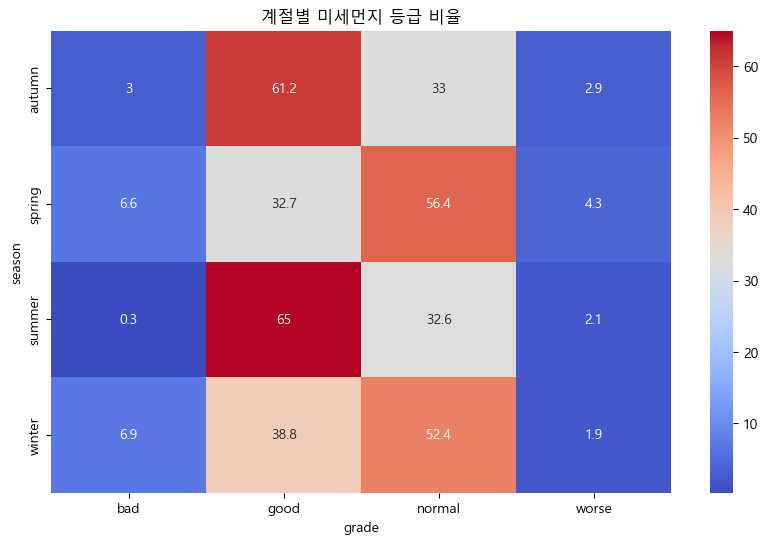

In [5]:
# Heatmap

# Cross table
cross_table = pd.crosstab(air['season'], air['grade'], margins=True, margins_name='Total')

# Percent table
percent_table = (cross_table.div(cross_table['Total'], axis=0) * 100).round(1)

# Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(percent_table.iloc[:-1, :-1], annot=True, cmap='coolwarm', fmt='g', cbar=True)
plt.title('계절별 미세먼지 등급 비율')
plt.ylabel('grade')
plt.ylabel('season')
plt.show()

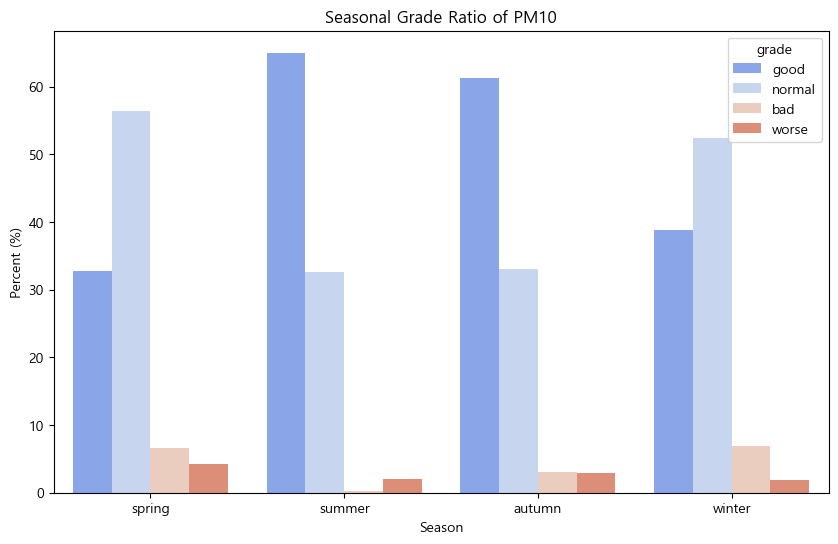

In [6]:
# Bar Plot
df_melted = percent_table[:-1].reset_index().melt(id_vars='season', var_name='grade', value_name='percent')

season_order = ['spring', 'summer', 'autumn', 'winter']
grade_order = ['good', 'normal', 'bad', 'worse']
df_melted['season'] = pd.Categorical(df_melted['season'], categories=season_order, ordered=True)
df_melted['grade'] = pd.Categorical(df_melted['grade'], categories=grade_order, ordered=True)

# Visualization
custom_palette = sns.color_palette("coolwarm", n_colors=len(grade_order))
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='percent', hue='grade', data=df_melted, palette='coolwarm')
plt.title('Seasonal Grade Ratio of PM10')
plt.xlabel('Season')
plt.ylabel('Percent (%)')
plt.show()

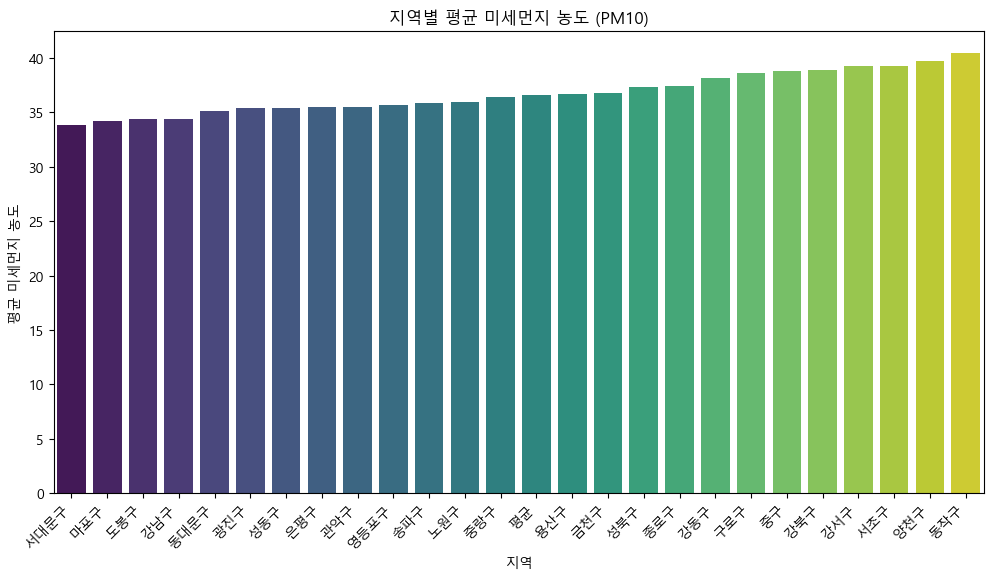

In [7]:
# 지역별 비교
df_district_pm10 = air[['district', 'PM10']]

# Avarage Calculation
avg_pm10_by_district = df_district_pm10.groupby('district')['PM10'].mean().reset_index()

# Ascending Arrange by PM10
avg_pm10_by_district = avg_pm10_by_district.sort_values(by='PM10')

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='district', y='PM10', data=avg_pm10_by_district, palette='viridis')
plt.title('지역별 평균 미세먼지 농도 (PM10)')
plt.xlabel('지역')
plt.ylabel('평균 미세먼지 농도')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.show()

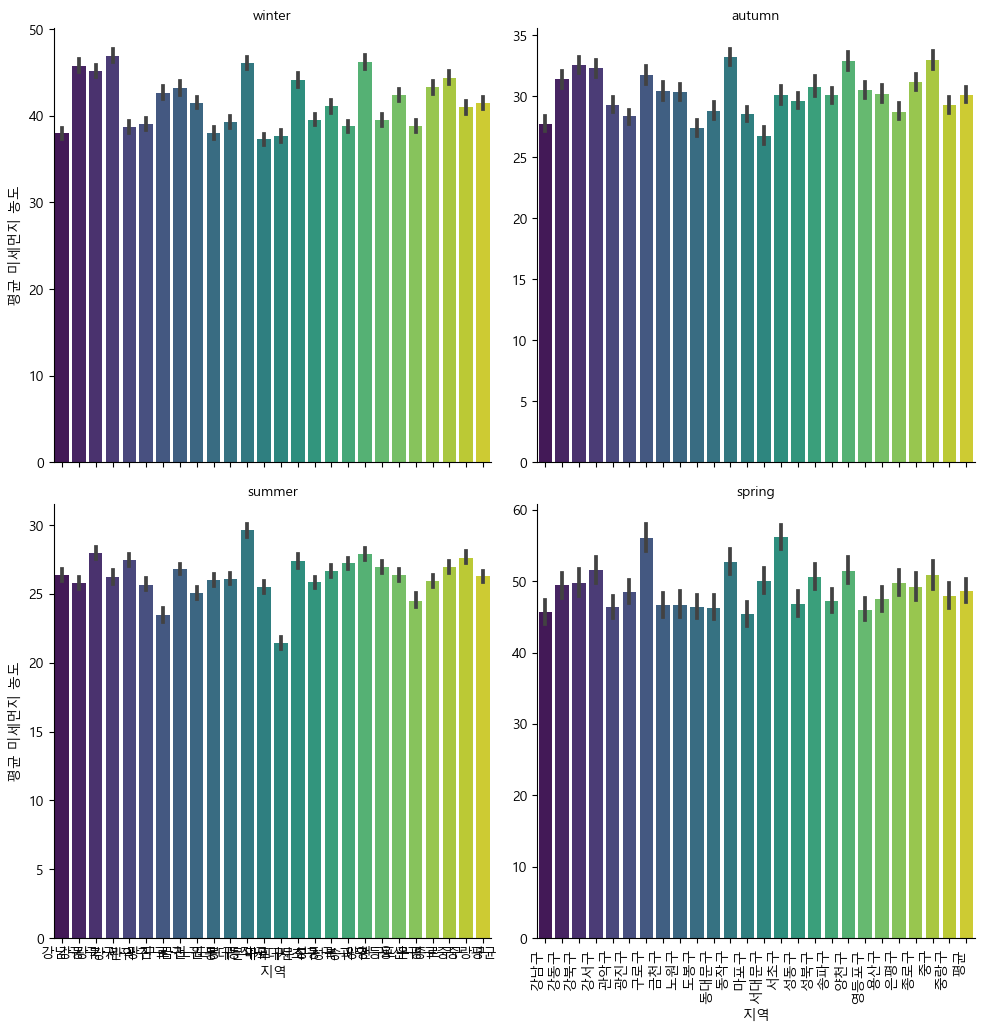

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
# 각 계절별 지역별 비교

# Layout Warnings Deactivation
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

df_district_pm10_season = air[['district', 'PM10', 'season']]

# District Arrange by Korean Word Order
district_order = sorted(df_district_pm10_season['district'].unique())

# Visualization
g = sns.FacetGrid(df_district_pm10_season, col='season', col_wrap=2, height=5, sharey=False)
g.map(sns.barplot, 'district', 'PM10', order=district_order, palette='viridis')
g.set_axis_labels('지역', '평균 미세먼지 농도')
g.set_titles(col_template="{col_name}")
plt.xticks(rotation=90, ha='right')
plt.show()

# Adjust layout
g.fig.subplots_adjust(wspace=3, hspace=3)

for ax in g.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title='지역')

plt.show()